# Chapter 1: Linear neural netwrok
Author: Hsiu-Wen Chang, Center of Robotics, Mines Paristech, PSL
2025.11.03


Gvien features $x \in \bold{R}^d$ and target $y$ and assume they have linear relationship. Our goal is to choose the weights $w$ and the bias $b$ that , on average, make our model's predictions fit the true target $y$ as closely as possible. 
$$
\begin{split}
\hat{y}&=w_{1}x_{1}+w_{2}x_{2}+...+w_{d}x_{d}+b \\ &={\bold{w}^T\bold{x}}+b  \\&=\bold{X}\bold{w}+b
\end{split}
$$

where b is bias, vectors are expressed as lowercase and  in bold; matix are expressed as uppercase and in $\bold{X} \in \bold{R}^{n\times d}$. Offently, augmented input $[\bold{x},1]$ and augmented weight $[\bold{w},b]$  are used to form an easier math
$$
\hat{y}=\bold{w}^T\bold{x}
$$

In [44]:
# This example show you the speed difference between values operation and vector operation

import numpy as np
import time

# using normal values
x = np.array([1, 2,3]) # d is three is this example
y = np.array([14])
w = np.ones_like(x)
b=0.0
y_hat = np.dot(w, x)+b
print(y_hat)

# using augmented vectors
x_aug = np.append(x, 1)  # Augment x with a bias term
w_aug = np.append(w, b)  # Augment w with the bias weight
y_hat_aug = np.dot(w_aug, x_aug)
print(y_hat_aug)  

# using matrix multiplication for learning batch concept
x2 = np.array([[1, 2, 3],[1,-3, 0]]) #2x2 matrix (2 samples, 2 features)
y2 = np.array([[14,-5]]) #assume we have two targets
w2 = np.ones((x2.shape[1], 1))
b2 = 0.0
y_hat2 = np.dot(x2, w2) + b2
print(y_hat2)  # Output: [[7. 7.]

6.0
6.0
[[ 6.]
 [-2.]]


Denote the difference between target and current predition $l(w)=\hat{y}-y$ as loss function, we can adjust w by using partial deriviative in order to minimize the loss function:
$$
\begin{split}
\Delta{\bold{w}} &=\frac{\partial l}{\partial w}=\frac{\bold{w}^T\bold{x}-y}{\partial w}=\bold{x} \\
\bold{w} &= \bold{w}+\alpha\Delta{\bold{w}} = \bold{w} + \bold{x}
\end{split}
$$

where $\Delta \bold{w}$ is called gradient$, $\alpha$ is leaning rate and is typically a hyper parameter. There are varient algorithm to automatically adjust learning rate, or use second derivative (momentum), see reference [1].  

Given $n$ number f the target $y$ and observation $x$, the performance of the model is based on the cost function (average of several loss functions). The simplest one is the average of distance between the real and predicted values of the target. $$ L(\bold{w},b)=\frac{1}{n}\sum_{i=1}^{n}l^{(i)}(\bold{w},b)=\frac{1}{n}\sum_{i=1}^{n}(\frac{1}{2}(\bold{w}^T{\bold{x}^{(i)}+b-y^{(i)}})^2)$$

When training the model, we seek optimal parameters $\bold{w}^*,b^*$ that minimize the total loss across all training examples:
$$
\bold{w}^*,b^*=\argmin_{\bold{w},b}L(\bold{w},b)
$$

The question is, when do we update the weight? Three types of graident descent:
- Batch gradient descent: sums over the error for each point in a training set, updating the model only after all training examples. It produces a stable error gradient and convergence, but needs to store all of the data into memory and less efficient
- Stochastic gradient descent (SGD): it updates model each training example's parameters one at a time, therefore, it is faster and less cost of memory. However, it can be less efficient when compared to batch gradient descent. Major problem in computation is that processors are a lof of faster multiplying and adding numbers tahn they are at moving data from main memory to processor cache. This means that it can take a lot longer to process one sample at a simte compared to full batch. A scond problem is that some of the modern layers of neural network operation, such as batch normalization, only work well when we have access to more than one observation at a time
- Minibatch gradient descent [2]: this is mixed method of two previous methods. The specific choice of the size of minibatch depends on amount of memory, the number of accelerators, the choice of layers, and the total dataset size. Despite all that, a number between 32 and 256 is a good start. 

## Minibatch stochastic gradient descent

For each iteration $t$, we randomly sample a minibatch $\mathcal{B}_t$ consisting of a fixed number $|\mathcal{B}|$ of training examples, then we compute the derivative of the average loss on the minibatch with respect to the model parameters:
$$
\begin{split}\begin{aligned} \mathbf{w} & \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) && = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_b l^{(i)}(\mathbf{w}, b) &&  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}
$$

inital weights:[[0.95542267 0.9082419  0.96514274]], initial bias:[0.36520383]
final Loss: 1.7163452213929765e-06
estimated weights:[[1.29895268 2.3356529  2.43994335]], estiamated bias:[0.70873384]
True weights: [[1],[2],[3]]


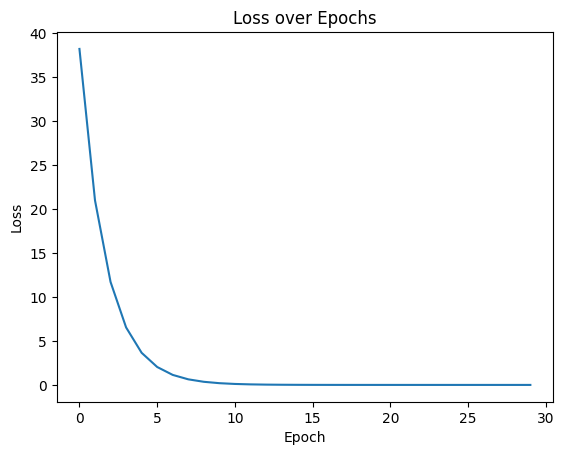

In [37]:
learning_rate = 0.1
epoch = 30
# step 1: intialize parameters with random number between 0 to 1
w2=np.random.rand(x2.shape[1], 1)
b2=np.random.rand(1)
print(f"inital weights:{w2.T}, initial bias:{b2}")
loss_history = []
for t in range(epoch):
    # step 2: compute the prediction
    y_hat2 = np.dot(x2, w2) + b2

    # step 3: compute the loss (mean squared error)
    loss = np.mean((y2 - y_hat2.T) ** 2)
    loss_history.append(loss)
    #print(f"t={t}: Loss:", loss)

    # step 4: compute the gradients
    m = x2.shape[0]  # number of samples
    dw = (-2/m) * np.dot(x2.T, (y2.T - y_hat2))
    db = (-2/m) * np.sum(y2.T - y_hat2)

    # step 5: update the parameters
    w2 -= learning_rate * dw
    b2 -= learning_rate * db

print(f"final Loss:", loss)

print(f"estimated weights:{w2.T}, estiamated bias:{b2}")
print("True weights: [[1],[2],[3]]")
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

## Genralization

It is important to understand that the estimated weight and bias are not determinisim even our function is truly linear and noiseless because of the randomness of minibatches. In practice, deep learning practitioners are not trying to find parameters that minimize the cost on training sets, they search for accurate predictions on previouly unseen data (test dataset), a challenge called $\textbf{generalization}$. The loss function discussed above only uses training data, so it is training error. While we use test data into loss function, we can get generalization error which is impoartant for evaluation.

In the standard supervised learning setting, we assume that the training data and the test data are drawn independently from identical distributions, called IID assumption. Classically, when we have simple models and the abundant data, the training and generalization errors tend to be close. However, when we work with more comple models and/or fewer examples, the training error can go down but the generalization gap will grow. Polynomial curving fitting is a good example.
$$
\hat{y}=\Sigma_{i=0}^{d}x^{i}w_i
$$

coeffs for higher polynomial (highest->lowest): [ 0.00084807 -0.00163796 -0.0090232   0.06355944  0.7555235   0.24023409]
coeffs for lower polynomial (highest->lowest): [ 1.02785518 -0.05881525]
training loss with higher polynomial: 2.9582283945787943e-31
training loss with lower polynomial: 0.00838641550215443
test loss with higher polynomial: 0.01337455749516868
test loss with lower polynomial: 0.003090592936871302


/tmp/ipykernel_12983/2680503305.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs_h = np.polyfit(x, y, deg=5)  # higher degree polynomial


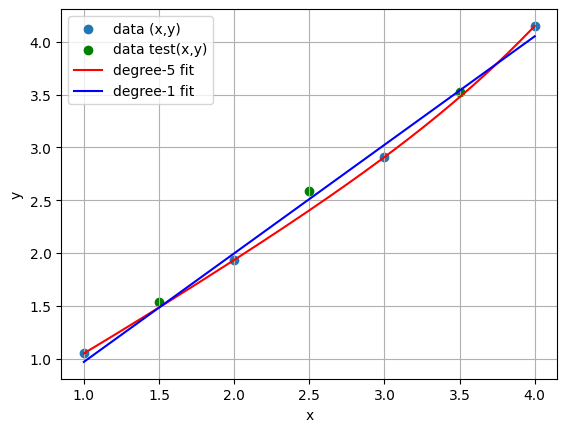

In [69]:
# This example show you the overfitting and generalization issue using polynomial fitting
x = np.array([1, 2, 3, 4])
y = x +np.random.randn(4) * 0.1 # true function is y = x with noise 0.1
x_test = np.array([1.5, 2.5, 3.5])
y_test = x_test+np.random.randn(3) * 0.1

# fit polynomial (will exactly interpolate 4 points)
coeffs_h = np.polyfit(x, y, deg=5)  # higher degree polynomial
coeffs_l = np.polyfit(x, y, deg=1)  # true degree is 1
print('coeffs for higher polynomial (highest->lowest):', coeffs_h)
print('coeffs for lower polynomial (highest->lowest):', coeffs_l)

# build polynomial and evaluate
ph = np.poly1d(coeffs_h)
pl = np.poly1d(coeffs_l)
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = ph(x_fit)
y_fit_l = pl(x_fit)
y_pred = ph(x)
y_pred_l = pl(x)
y_test_pred = ph(x_test)
y_test_pred_l = pl(x_test)
print('training loss with higher polynomial:', np.mean((y - y_pred)**2))
print('training loss with lower polynomial:', np.mean((y - y_pred_l)**2))
print('test loss with higher polynomial:', np.mean((y_test - y_test_pred)**2))
print('test loss with lower polynomial:', np.mean((y_test - y_test_pred_l)**2))

# plot data and fitted polynomial
plt.scatter(x, y, color='C0', label='data (x,y)')
plt.scatter(x_test, y_test, color='g', label='data test(x,y)')
plt.plot(x_fit, y_fit, 'r-', label='degree-5 fit')
plt.plot(x_fit, y_fit_l, 'b-', label='degree-1 fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


As the above bound already indicates, another big consideration to bear in mind is $\textbf{dataset size}$. Fixing our model, the fewer samples we have in the training dataset, the more likely (and more severely) we are to encounter overfitting. As we increase the amount of training data, the generalization error typically decreases. Moreover, in general, more data never hurts. For a fixed task and data distribution, model complexity should not increase more rapidly than the amount of data. Given more data, we might attempt to fit a more complex model. Absent sufficient data, simpler models may be more difficult to beat. For many tasks, deep learning only outperforms linear models when many thousands of training examples are available. In part, the current success of deep learning owes considerably to the abundance of massive datasets arising from Internet companies, cheap storage, connected devices, and the broad digitization of the economy.

## Regularization

Beside collecting more training data for mitigating overfitting issue, we can use sevearl other techniques to avoid it. One is called weight decay by tweaking the degree of the fitted polynomial. This is achieved by restricting the values that the parameters can take: adding $l_p$ norm into loss function. This is called penalty. To control how much penalty should be considered in the loss function, a nonnegative parameter, regulization constant $\lambda$ is introduced.
$$
L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^p
$$

$l_2$ and $l_1$ norm are the most common methods in this regularization. Let p=2, we can derive the minibatch stochastic gradient descent updates as follows:
$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

Let's see this example that is trying to learn the function of 
$$
y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \textrm{ where } \epsilon \sim \mathcal{N}(0, 0.01^2)
$$

In [81]:
num_inputs=200
num_train=20
num_test=100
batch_size=5

#generate dataset
n=num_train+num_test
X=np.random.randn(n, num_inputs)
noise=np.random.randn(n,1)*0.01
w, b = np.ones((num_inputs, 1)) * 0.01, 0.05
y=np.dot(X, w) + b + noise

#defind l2 norm penalty
def l2_penalty(w):
    return np.sum(w**2)/2

#define loss function
def compute_loss(X, y, w, b, weight_decay):
    num_samples = X.shape[0]
    y_pred = np.dot(X, w) + b
    mse_loss = np.mean((y_pred - y) ** 2)
    l2_loss = weight_decay * l2_penalty(w)
    total_loss = mse_loss + l2_loss
    return total_loss

# define model training function with mini-batch gradient descent and weight decay
def train_model(X_train, y_train, X_test, y_test, learning_rate, weight_decay, num_epochs, batch_size):
    num_samples, num_features = X_train.shape
    w = np.random.randn(num_features, 1)
    b = 0.0

    for epoch in range(num_epochs):
        # Shuffle the training data
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        # Mini-batch gradient descent
        for start in range(0, num_samples, batch_size):
            end = start + batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            # Compute predictions
            y_pred = np.dot(X_batch, w) + b

            # Compute gradients
            error = y_pred - y_batch
            dw = (2 / batch_size) * np.dot(X_batch.T, error) + weight_decay * w
            db = (2 / batch_size) * np.sum(error)

            # Update parameters
            w -= learning_rate * dw
            b -= learning_rate * db

        # Compute and print loss every 10 epochs
        if (epoch + 1) % 1 == 0:
            train_loss = compute_loss(X_train, y_train, w, b, weight_decay)
            test_loss = compute_loss(X_test, y_test, w, b, weight_decay)
            print(f'Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    return w, b

# Split the dataset into training and testing sets
X_train, y_train = X[:num_train], y[:num_train]
X_test, y_test = X[num_train:], y[num_train:]
# Train the model
learning_rate = 0.01
weight_decay = 3
num_epochs = 10

print("Training the model with weight decay...")
w, b = train_model(X_train, y_train, X_test, y_test, learning_rate, weight_decay, num_epochs, batch_size)
print("Training the model without weight decay...")
w_no_decay, b_no_decay = train_model(X_train, y_train, X_test, y_test, learning_rate, 0, num_epochs, batch_size)

Training the model with weight decay...
Epoch 1, Train Loss: 197.8211, Test Loss: 334.6807
Epoch 2, Train Loss: 152.0663, Test Loss: 260.5323
Epoch 3, Train Loss: 118.9021, Test Loss: 203.9188
Epoch 4, Train Loss: 93.1429, Test Loss: 159.7427
Epoch 5, Train Loss: 72.9905, Test Loss: 125.1855
Epoch 6, Train Loss: 57.2043, Test Loss: 98.1110
Epoch 7, Train Loss: 44.8338, Test Loss: 76.8913
Epoch 8, Train Loss: 35.1389, Test Loss: 60.2655
Epoch 9, Train Loss: 27.5408, Test Loss: 47.2315
Epoch 10, Train Loss: 21.5857, Test Loss: 37.0201
Training the model without weight decay...
Epoch 1, Train Loss: 20.0958, Test Loss: 254.4999
Epoch 2, Train Loss: 3.4486, Test Loss: 252.6566
Epoch 3, Train Loss: 0.7435, Test Loss: 252.4518
Epoch 4, Train Loss: 0.1617, Test Loss: 252.4307
Epoch 5, Train Loss: 0.0419, Test Loss: 252.7463
Epoch 6, Train Loss: 0.0106, Test Loss: 252.8293
Epoch 7, Train Loss: 0.0031, Test Loss: 252.9179
Epoch 8, Train Loss: 0.0010, Test Loss: 252.9569
Epoch 9, Train Loss: 0.00

## Seeing the problem from probability
In term of probability, The conditinal mean $E[Y|X=x]$ can be expressed as a weight sum of the features $x$. This setup allows that the target value $y$ may still deviate from its expected value on account of observation noise. 
$$
y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \textrm{ where } \epsilon \sim \mathcal{N}(0, \sigma^2)
$$

$\mathcal{N}$ is Gaussian (normal) distribution. The best values of model parameters are those that maximize the likelihood of the entire dataset (given $\mathbf{X}$, the probability of having $\mathbf{y}$), called maximum likelihood estimator (MLP):

$$
\begin{split}
P(y \mid \mathbf{x}) &= \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right)\\
P(\mathbf y \mid \mathbf X) &= \prod_{i=1}^{n} p(y^{(i)} \mid \mathbf{x}^{(i)}) 
\end{split}
$$


## Reference
[1] https://www.ceremade.dauphine.fr/~waldspurger/tds/22_23_s1/advanced_gradient_descent.pdf

[2] Li, M., Zhang, T., Chen, Y., & Smola, A. J. (2014). Efficient mini-batch training for stochastic optimization. Proceedings of the 20th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 661–670)

$\textbf{Question 1}$: 
In Bayesian statistics, a posterior $P(\theta|y) $ is derived by the use of product of prior $P(\theta) $ and the likelihood $P(y|\theta)$. How can you idientify $P(\theta)$ with regularization? y:observation, $\theta$: learning parameter

Recall maximun likelihood estimation (MLE): 
$$
\begin{split}
P(y|\theta) &=\prod_{i=1}^{n}P_Y{(y_i|\theta,\sigma^2)} \\
&=\prod_{i=1}^n{\frac{1}{\sigma \sqrt{2\pi}}}e^{\frac{-(y_i-(\theta_0+\theta_1x_{i,1}+...+\beta_{p}x_{i,p})^2)}{2\sigma^2}}
\end{split}
$$

This means the data points are normally distributed (gaussian distribution). The approximate this distribution, number of data, $n$, has to be sufficient. In case of smaller data set, we can add the priori knowledge of $\theta$ (distribution) to increase the accuracy, that is maximun posterior estimation (MAP): 
$$
\begin{split}
P(\theta|y)&=\frac{P(y|\theta)P(\theta)}{P(y)}\\ 
&=\frac{likelihood \cdot prior}{evidence}
\end{split}
$$

$\textbf{Ans}$: 

The choice of $P(\theta)$ can encode our knoweldge of the problem, here is how it works:
$$
\begin{split}
\hat{\theta}_{MAP}&=\argmax_{\theta}{P(\theta|y)}\\&=\argmax_{\theta}{\log{P(y|\theta)P(\theta)}}\\
&=\argmax_{\theta}{(\log{P(y|\theta)}+\log{P(\theta)})}
\end{split}
$$

Situation (1): if we have no prior knowledge of the distribution of $\theta$, then $\hat{\theta}_{MAP}=\hat{\theta}_{MLE}=\argmax_{\theta}{\log{P(y|\theta)}}$.

Situation (2): Assume the distribution of y and $\theta$ are normal with zero-means and variace $\sigma, \tau$, respectively. Substitude these distribution in to MAP estimation we can derive:
$$
\begin{split}
\hat{\theta}_{MAP}&=\argmax_{\theta}[\log{\prod_{i=1}^n{\frac{1}{\sigma \sqrt{2\pi}}}e^{\frac{-(y_i-(\bold{\theta X_i})^2)}{2\sigma^2}}}
+\log{\prod_{j=0}^p{\frac{1}{\tau\sqrt{2\pi}}{e^{\frac{-\theta_j^2}{2\tau^2}}}}}] \\
&=\argmax_{\theta}{[-\sum_{i=1}^n{\frac{-(y_i-(\bold{\theta X_i})^2)}{2\sigma^2}}-{\sum_{j=0}^p{\frac{-\theta_j^2}{2\tau^2}}}]}\\
&=\argmax_{\theta}{\frac{1}{2\sigma^2}[-\sum_{i=1}^n{-(y_i-(\bold{\theta X_i})^2)}+{\frac{\sigma^2}{\tau^2}\sum_{j=0}^p{\theta_j^2}}]}
\end{split}

$$ 

Now we can see the choice of $P(\theta)$ equal to the use of L2 regularization with $\lambda=\sigma^2/\tau^2$. If we have a small variance (large $\lambda$) the the coefficients will be close to zero; if a large variace (small $\lambda$) then the coefficients will not be affected much (close to no reqularization)